# EGRMGMT 590.10 Homework 4

*Due at 6:15pm ET on Thursday, March 21*

## Instructions

+ There are 9 exercises in total. Exercise 1 through 3 require coding. Your grades are based on the accuracy of the results, not the code execution speed.
  + Exercise 1: 1 point.
  + Exercise 2 and 3: each is worth 3 points. 
  + Exercise 4 to 9: each is worth 0.5 points. 
+ Exercise 1 through 3 require generating model parameters using code you built **from scratch** without relying on existing modules with functions or capabilities to "plug-in and populate" parameters for those models.
+ As the coding exercises require matrix manipulation, familiarize yourself with the following functions and methods:
  + numpy.linalg.inv
  + numpy.ndarray.dot
  + numpy.dot
  + numpy.ndarray.T   
+ Exercises are independent with each other. Feel free to work on them in the order you prefer.
+ Submit the .ipynb file to Sakai before 6:15pm ET on Thursday, March 21.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, March 21.

## Dataset

**Dataset Information:**

We'll be working on three datasets attached to Assignment 4 on Sakai. Each coding exercise requires a different dataset:
+ Exercise 1: 'Assignment4_SampleData_Ex1.csv'
+ Exercise 2: 'Assignment4_SampleData_Ex2.csv'
+ Exercise 3: 'Assignment4_SampleData_Ex3.csv'

## Exercises

### Exercise 1 

+ Read the data from 'Assignment4_SampleData_Ex1.csv' to a pandas DataFrame df1
+ Create the code from scratch to calculate the intercept and slope for a simple linear regression model with the input variable X and output variable Y in df1 using the Normal Equation approach
+ Compare the intercept and slope you calculated with the results returned by sklearn's LinearRegression
+ No need to split the data into training and testing for this exercise
+ *Hint: refer to slide 16 in the week 7 deck. If calculated correctly, your parameters should be exactly the same as those returned by sklearn.*

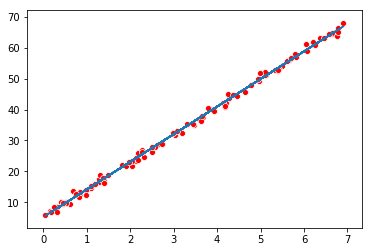

The intercept and slope according to the Normal Equation
intercept: 5.215096157546816 slope: 8.934318110410974

The intercept and slope according to SKLearn
intercept: [5.21509616] slope: [[8.93431811]]


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
df1=pd.read_csv('/Users/paras/Desktop/Assignment4_SampleData_Ex1.csv')
b=np.array(df1.X)
b=b.reshape(b.shape[0],1)
y=np.array(df1.Y)
x = np.concatenate((np.ones((b.shape[0],1)), b), axis = 1)
theta=np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
x_new=theta[1]*x + theta[0]
_=plt.plot(x[:,1],x_new[:,1])
_=sns.scatterplot(x[:,1],y,color="R")
plt.show()

print("The intercept and slope according to the Normal Equation")
print('intercept: '+ str(theta[0])+ ' slope: '+ str(theta[1]))

X=pd.DataFrame(df1.X)
y=pd.DataFrame(df1.Y)
linearRegressor = LinearRegression()
"""for i in range(10000):
    xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size = 0.2,random_state=i)"""

linearRegressor.fit(X, y)
print("\nThe intercept and slope according to SKLearn")
print('intercept: '+ str(linearRegressor.intercept_)+ ' slope: '+ str(linearRegressor.coef_))


### Exercise 2

+ Read the data from 'Assignment4_SampleData_Ex2.csv' to a pandas DataFrame df2
+ Create a function BGD from scratch to estimate the intercept and slopes for a multiple linear regression model with X1 and X2 as the input variables and Y as the output variable using the Batch Gradient Descent approach
+ Compare your estimates with the results returned by sklearn's LinearRegression
+ No need to split the data into training and testing for this exercise
+ *Hint: refer to slide 26-30 in the week 7 deck. If implemented correctly, your parameters should be similar to those returned by sklearn.*

In [87]:
import pandas as pd


def BGD(X, Y, eta, n_rounds, tol, random_state):
    """
    Returns the intercept and predictor coefficients for a multiple linear regression model using Batch Gradient Descent 
    with MSE as the cost function.
    
    Parameters
    ----------
    X: a numpy ndarray with the independent variables
    Y: a numpy ndarray with the dependent variable
    eta: the learning rate, e.g. 0.1, 0.01, 0.001 etc.
    n_rounds: number of passes over the data, e.g. 100, 1000, 10000 etc.
    tol: the stopping criteria, i.e. previous MSE - current MSE < tol
    random_state: a random state to make the randomness deterministic
    
    Examples
    ----------
    BGD(X, Y)
    BGD(X, Y, eta = 0.01)
    
    Notes
    ----------
    The parameters are returned in a numpy ndarray.
    
    """
    np.random.seed(random_state)
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta=np.random.rand(n+1)
    h = hypothesis(theta, X, n)
    theta,cost = gd(theta,eta,n_rounds,h,X,y,n,tol)
    return theta,cost

def gd(theta, eta, n_rounds, h, X, y, n,tol):
    cost = np.ones(n_rounds)
    for i in range(0,n_rounds):
        theta[0] = theta[0] - (eta/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (eta/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
        if abs(cost[i-1]-cost[i])<tol:
            break
    return theta,cost

def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h


df2=pd.read_csv('/Users/paras/Desktop/Assignment4_SampleData_Ex2.csv')
x=df2.iloc[:,1:]
y=df2.iloc[:,0]
a,b=BGD(x,y,0.1,1000,0.000001,42)
print('Custom BDG implementation '+ str(a))
linearRegressor.fit(x,y)
print('Linear Regression from scikit learn: ' +str(linearRegressor.intercept_) + ' ' + str(linearRegressor.coef_))

Custom BDG implementation [4.88825037 5.8408434  9.105232  ]
Linear Regression from scikit learn: 4.910610036450066 [5.82913734 9.10275877]


### Exercise 3

+ Read the data from 'Assignment4_SampleData_Ex3.csv' to a pandas DataFrame df3
+ Create a function BGD_LogisticRegression from scratch to estimate the intercept and slopes for a binary logistic regression model with X1, X2 and X3 as the input variables and Y as the output variable using the Batch Gradient Descent approach
+ Compare the F1 score of the logistic regression models using the parameters returned by BGD_LogisticRegression vs. sklearn's LogisticRegression
+ No need to split the data into training and testing for this exercise
+ *Hint: refer to slide 58-62 in the week 7 deck. If implemented correctly, your F1 score should be close to that returned by sklearn.*

In [96]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score

def BGD_LogisticRegression(X, y, eta, n_rounds, tol, random_state):
    """
    Returns the intercept and predictor coefficients for a binary logistic regression model using Batch Gradient Descent 
    with the log loss as the cost function.
    
    Parameters
    ----------
    X: a numpy ndarray with the independent variables
    Y: a numpy ndarray with the dependent binary categorical variable
    eta: the learning rate, e.g. 0.1, 0.01, 0.001 etc.
    n_rounds: number of passes over the data, e.g. 100, 1000, 10000 etc. 
    tol: the stopping criteria, i.e. previous log loss - current log loss < tol
    random_state: a random state to make the randomness deterministic
    
    Examples
    ----------
    BGD_LogisticRegression(X, Y)
    BGD_LogisticRegression(X, Y, eta = 0.001)
    
    Notes
    ----------
    The parameters are returned in a numpy ndarray.
    
    """
    np.random.seed(random_state)
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.random.rand(n+1)
    h = hypothesis1(theta, X, n)
    theta,cost = BGD1(theta,eta,n_rounds,h,X,y,n,tol)
    return theta, cost
        

    
def BGD1(theta, eta, n_rounds, h, X, y, n,tol):
    cost = np.ones(n_rounds)
    for i in range(0,n_rounds):
        theta[0] = theta[0] - (eta/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j]=theta[j]-(eta/X.shape[0])*sum((h-y)*X.transpose()[j])
        h = hypothesis1(theta, X, n)
        cost[i]=(-1/X.shape[0])*sum(y*np.log(h)+(1-y)*np.log(1 - h))
        if abs(cost[i-1]-cost[i])<tol:
            break
    theta = theta.reshape(1,n+1)
    return theta, cost


def hypothesis1(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(1 / (1 + np.exp(-float(np.dot(theta, X[i])))))
    h = h.reshape(X.shape[0])
    return h

df3=pd.read_csv('/Users/paras/Desktop/Assignment4_SampleData_Ex3.csv')
X=df3.iloc[:,1:]
Y=df3.iloc[:,0]

x=df3.iloc[:,1:]
a,b=BGD_LogisticRegression(X, Y, 0.1,3000,0.00000001,42)
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
h = hypothesis1(a, X, X.shape[1] - 1)
for i in range(0, h.shape[0]):
    if h[i] > 0.5:
        h[i] = 1
    else:
        h[i] = 0

print('The intercept and the slopes through custom bgd are ' + str(a))
f1_score111=f1_score(Y,h)
lg=LogisticRegression(random_state=42)
lg.fit(x,Y)
predicted = lg.predict(x)
f=f1_score(Y,predicted)

print('The intercept and the slopes throug scikit learn are ' +str(lg.intercept_) + ' ' +str(lg.coef_) + '\n')
print('The f1 score calculated through custom bgd implementation is ' + str(f1_score111))
print('The f1 score calculated through scikit learn logistic regression is :'+str(f))

"""To make it more precise increase the n_rounds but this would take up the computation time."""

The intercept and the slopes through custom bgd are [[3.56817585 1.25764884 4.47655341 5.95248491]]
The intercept and the slopes throug scikit learn are [3.71164161] [[1.33153031 4.66805387 6.21836126]]

The f1 score calculated through custom bgd implementation is 0.9732484076433122
The f1 score calculated through scikit learn logistic regression is :0.9725940089228807


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Exercise 4

Do all Gradient Descent algorithms result in the same model if you run them long enough?

In [ ]:
"""If it is  Linear Regression or Logistic Regression, and assuming
the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum 
and end up producing fairly similar models. However, unless you gradually reduce the learning rate, 
Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth 
around the global optimum. This means that even if you let them run for a very long time, these 
Gradient Descent algorithms will produce slightly different models."""

### Exercise 5

Explain the main difference between the Ridge, Lasso, and Elastic Net regressions.

In [ ]:
"""Ridge and Lasso regression use two different penalty functions. Ridge uses l2 where as lasso goes with l1. 
In ridge regression, the penalty is the sum of the squares of the coefficients and for the Lasso, 
it’s the sum of the absolute values of the coefficients. ElasticNet is hybrid of lasso and ridge regression . 
It is trained with L1 and L2 prior as regularizer"""

### Exercise 6

How does increasing the hyperparameter of the Lasso regression impact the model's bias and variance?

In [ ]:
#With the increase in hyperparameter, there is an increase in bias with a decrease in variance

### Exercise 7

What is a Support Vector?

In [ ]:
#The vectors that define the hyperplane are the support vectors.

### Exercise 8

Why is it important to scale the input features when using SVM?

In [ ]:
"""SVM tries to maximize the distance between the separating plane and the support vectors. 
If one feature has very large values, it will dominate the other features when calculating the distance. 
If you rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric"""

### Exercise 9

What is the main difference between the hard and soft margin classifers?

In [ ]:
"""Hard-margin
This assumes that data is very well behaved, and you can find a perfect classifier - which will have 
0 error on train data.

Soft-margin
Data is usually not well behaved, so SVM hard margin may not have any solution at all. 
So we allow for a little bit of error on some points. So the training error will not be 0, 
but average error over all points is minimized. 
"""